## COMPIM Project
# Visualization and evaluation of the denoising process of pre-trained T3SC models on ICVL dataset

**Authors:** Achraf Jenzri, Hamdi Sghir, Nassim Ladhar, Selman Sezgin

### Imports

In [22]:
from google.colab import drive
import json
import scipy.io
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch

### Connect to remote files

In [5]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
cd drive/MyDrive/T3SC1

/content/drive/.shortcut-targets-by-id/10ulYJRa0j0p2-qDMqfCx3VDBBDK2lRXV/T3SC1


In [11]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch-1.9.1-cp39-cp39-manylinux1_x86_64.whl (831.4 MB)
  Using cached omegaconf-2.1.1-py3-none-any.whl (74 kB)
  Using cached pytorch_lightning-1.4.9-py3-none-any.whl (925 kB)
  Using cached matplotlib-3.3.3-cp39-cp39-manylinux1_x86_64.whl (11.6 MB)
  Using cached torchvision-0.10.1-cp39-cp39-manylinux1_x86_64.whl (22.1 MB)
  Using cached hydra_core-1.1.1-py3-none-any.whl (145 kB)
  Using cached numpy-1.19.4-cp39-cp39-manylinux2010_x86_64.whl (14.5 MB)
  Using cached h5py-3.1.0-cp39-cp39-manylinux1_x86_64.whl (4.4 MB)
  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Using cached lmdb-1.2.1-cp39-cp39-manylinux2010_x86_64.whl (306 kB)
  Using cached torchmetrics-0.7.3-py3-none-any.whl (398 kB)
  Using cached torchaudio-0.9.1-cp39-cp39-manylinux1_x86_64.whl (1.9 MB)
  Using cached torchtext-0.10.1-cp39-cp39-manylinux1_x86_64.whl (7.6 MB)
  Using c

### Load the data and the results

In [14]:
# Names of the test images
img_names = [
    'bulb_0822-0909',
    'grf_0328-0949',
    'nachal_0823-1110',
    'nachal_0823-1144',
    'negev_0823-1005',
    'objects_0924-1636',
    'omer_0331-1118',
    'rmt_0328-1241-1',
    'rsh_0406-1441-1'
]

In [40]:
# Load raw images
raw_images = list()
for name in img_names:
    f = h5py.File(f'data/ICVL/raw/{name}.mat')
    img_raw = np.transpose(f['rgb'][:], (1, 2, 0))
    raw_images.append(img_raw)

In [78]:
# Load clean images
clean_images = list()
for name in img_names:
    x = torch.load(f'data/ICVL/clean/{name}.pth').numpy()
    img_clean = np.transpose(x[[8, 14, 27], :], (1, 2, 0))
    clean_images.append(img_clean)

In [41]:
# Load metrics
test_path = 'data/tests/2023-03-19_08-25-04/T3SC_icvl_ConstantNoise-v25_beta0_ssl0_seed0'
with open(test_path + '/test_metrics.json', 'r') as f:
    metrics = json.load(f)

In [42]:
# Load noisy and denoised images
noisy_images = list()
denoised_images = list()
for name in img_names:
    noisy_images.append(plt.imread(test_path + f'/rgb/{name}_in.png'))
    denoised_images.append(plt.imread(test_path + f'/rgb/{name}_out.png'))

### Plot denoising results for each image

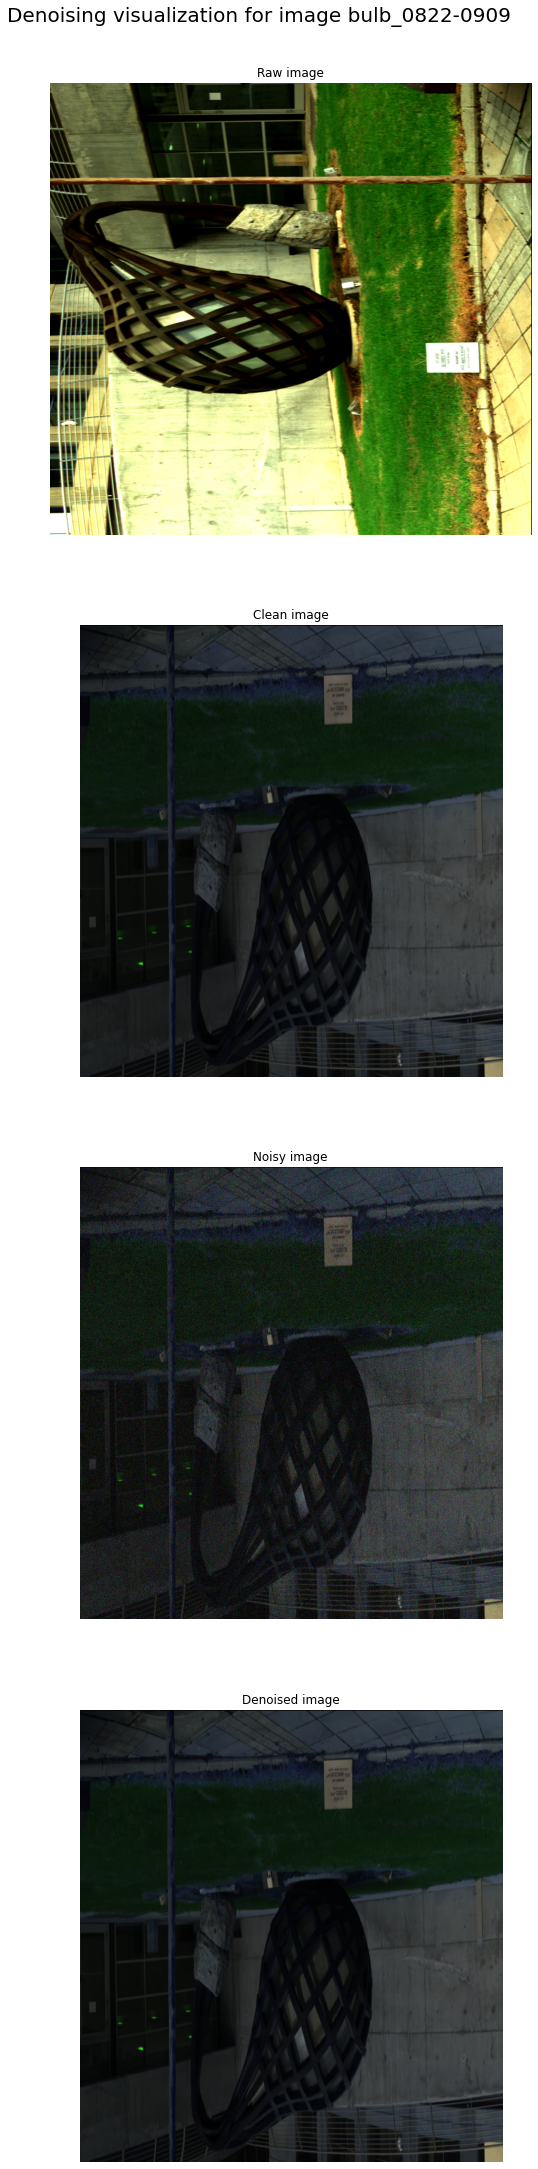

In [80]:
fig, axs = plt.subplots(4, 1, figsize=(35, 35))
plt.suptitle(f'Denoising visualization for image {img_names[0]}', fontsize=20)
axs[0].imshow(raw_images[0])
axs[0].set_title('Raw image')
axs[1].imshow(clean_images[0])
axs[1].set_title('Clean image')
axs[2].imshow(noisy_images[0])
axs[2].set_title('Noisy image')
axs[3].imshow(denoised_images[0])
axs[3].set_title('Denoised image')
[axi.set_axis_off() for axi in axs.ravel()]
fig.subplots_adjust(top=0.95)
plt.show()

In [64]:
print(f"Metrics for image {img_names[0]}")
print("")
metrics[img_names[0]]

Metrics for image bulb_0822-0909



{'psnr_in': 21.478893280029297,
 'psnr_out': 44.93439483642578,
 'mpsnr_in': 21.512271204302387,
 'mpsnr_out': 45.831057333177135,
 'mssim_in': 0.1458210191239286,
 'mssim_out': 0.9816675805756601,
 'mfsim_in': 0.9324397444725037,
 'mfsim_out': 0.9967549443244934,
 'mergas_in': 28.400889034403953,
 'mergas_out': 1.6459396247623315,
 'msam_in': 0.6385862231254578,
 'msam_out': 0.037397559732198715}

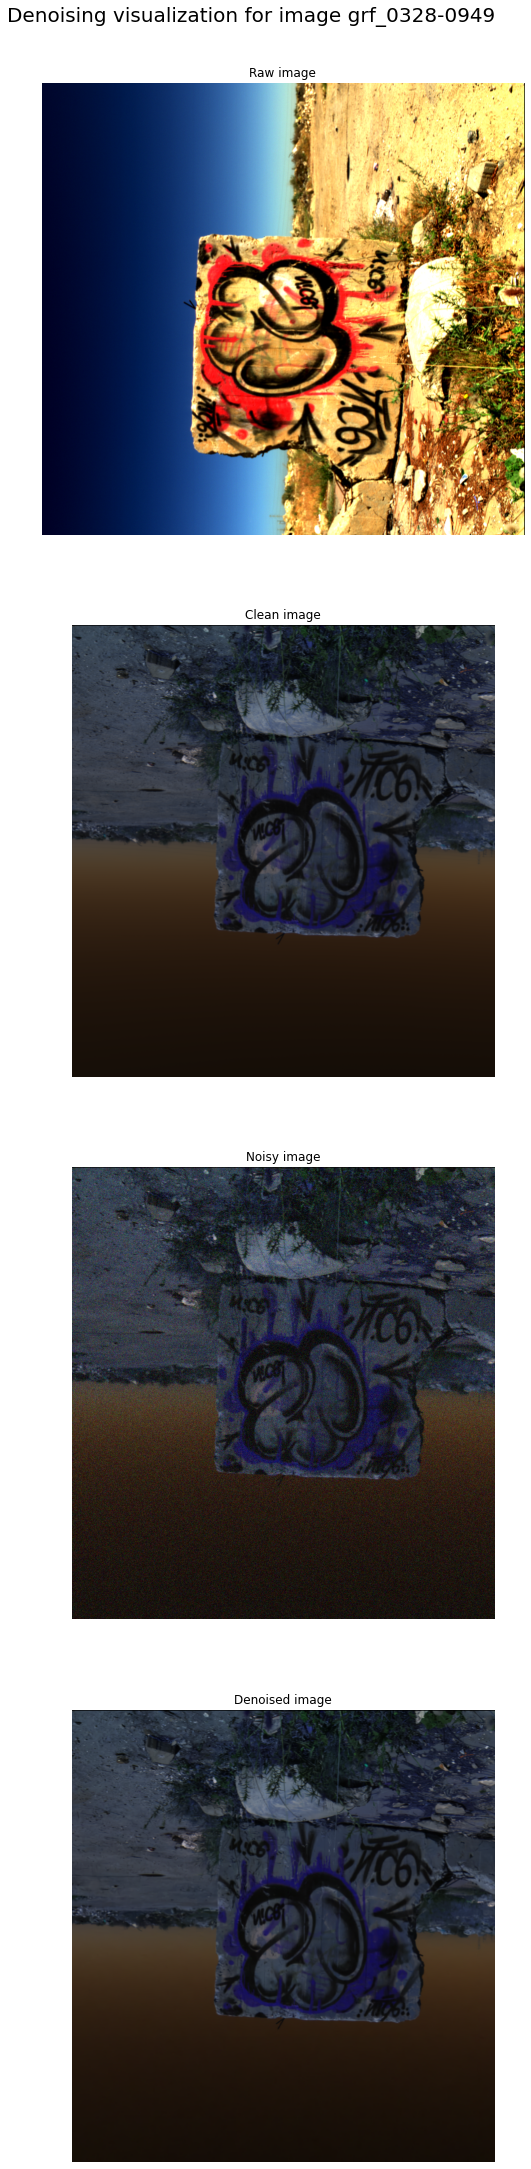

In [81]:
fig, axs = plt.subplots(4, 1, figsize=(35, 35))
plt.suptitle(f'Denoising visualization for image {img_names[1]}', fontsize=20)
axs[0].imshow(raw_images[1])
axs[0].set_title('Raw image')
axs[1].imshow(clean_images[1])
axs[1].set_title('Clean image')
axs[2].imshow(noisy_images[1])
axs[2].set_title('Noisy image')
axs[3].imshow(denoised_images[1])
axs[3].set_title('Denoised image')
[axi.set_axis_off() for axi in axs.ravel()]
fig.subplots_adjust(top=0.95)
plt.show()

In [82]:
print(f"Metrics for image {img_names[1]}")
print("")
metrics[img_names[1]]

Metrics for image grf_0328-0949



{'psnr_in': 21.182783126831055,
 'psnr_out': 43.44446563720703,
 'mpsnr_in': 21.20728538882348,
 'mpsnr_out': 44.19628635529549,
 'mssim_in': 0.16263068465375877,
 'mssim_out': 0.9825669253101614,
 'mfsim_in': 0.9145570397377014,
 'mfsim_out': 0.9978880286216736,
 'mergas_in': 24.88153264320504,
 'mergas_out': 1.7411203640960458,
 'msam_in': 0.5564582943916321,
 'msam_out': 0.02696736715734005}

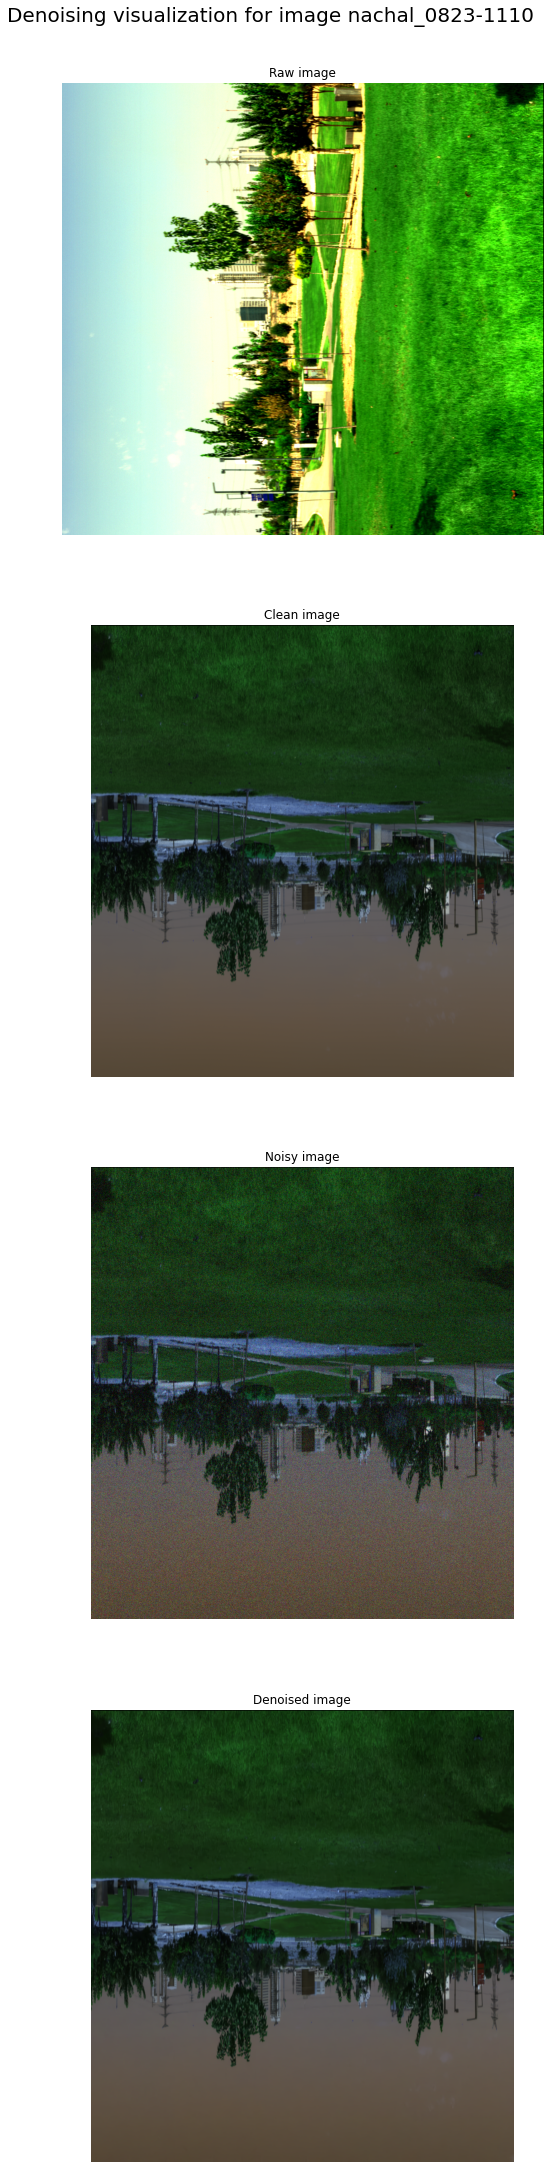

In [83]:
fig, axs = plt.subplots(4, 1, figsize=(35, 35))
plt.suptitle(f'Denoising visualization for image {img_names[2]}', fontsize=20)
axs[0].imshow(raw_images[2])
axs[0].set_title('Raw image')
axs[1].imshow(clean_images[2])
axs[1].set_title('Clean image')
axs[2].imshow(noisy_images[2])
axs[2].set_title('Noisy image')
axs[3].imshow(denoised_images[2])
axs[3].set_title('Denoised image')
[axi.set_axis_off() for axi in axs.ravel()]
fig.subplots_adjust(top=0.95)
plt.show()

In [84]:
print(f"Metrics for image {img_names[2]}")
print("")
metrics[img_names[2]]

Metrics for image nachal_0823-1110



{'psnr_in': 20.889081954956055,
 'psnr_out': 43.57559585571289,
 'mpsnr_in': 20.924573636824086,
 'mpsnr_out': 44.71660106412826,
 'mssim_in': 0.1563556485028858,
 'mssim_out': 0.9798064629952348,
 'mfsim_in': 0.9051425457000732,
 'mfsim_out': 0.9972975254058838,
 'mergas_in': 22.687337860950176,
 'mergas_out': 1.4575946578765666,
 'msam_in': 0.46810033917427063,
 'msam_out': 0.023077934980392456}